---



### What You Learned

| Part | Topic | Key Takeaway |
|------|-------|-------------|
| I | JAX Fundamentals | jax.numpy is NumPy that runs on GPU/TPU |
| II | Transformations | `jit`, `vmap`, `grad` - composable superpowers |
| III | Einsum | Powerful tensor operations in one line |
| IV | Autodiff | `grad` and `value_and_grad` for automatic gradients |
| V | Primitives | Functional neural networks with PyTrees |
| VI | Flax | Production-ready code with nn.Module |
| VII | Training | Complete pipelines with Optax |

### JAX vs PyTorch: When to Use Which?

**Choose JAX when:**
- You need TPU support
- You want per-example gradients (research)
- You prefer functional programming
- You're doing cutting-edge research (DeepMind style)

**Choose PyTorch when:**
- You want a larger ecosystem/community
- You prefer OOP/stateful programming
- You need extensive pretrained models
- You're doing production deployment

### Next Steps

1. **Explore Flax deeper** - Batch normalization, dropout, custom layers
2. **Learn Haiku** - DeepMind's alternative to Flax
3. **Try Equinox** - A more PyTorch-like JAX library
4. **Study JAX internals** - XLA compilation, custom_vjp
5. **Build Transformers** - Attention mechanisms in JAX

---

*"JAX gives you the power of functional programming with the speed of XLA."*

**Happy Deep Learning!**

In [ ]:
# ============================================================================
#                         JAX CHEAT SHEET
# ============================================================================

print("="*70)
print("                  JAX CHEAT SHEET")
print("="*70)

cheat_sheet = """
ARRAYS
------
jnp.array([1,2,3])              # From list
jnp.zeros((2,3)), jnp.ones()    # Special arrays
random.PRNGKey(42)              # Create random key
random.split(key, n)            # Split into n keys
random.normal(key, shape)       # Random normal
x.at[i].set(v)                  # Functional update (immutable!)

TRANSFORMATIONS
---------------
jit(fn)                         # JIT compile for speed
grad(fn)                        # Get gradient function
value_and_grad(fn)              # Get value AND gradient
vmap(fn)                        # Auto-vectorize over batch
vmap(fn, in_axes=(None, 0))     # Specify which axes to map

PYTREES
-------
jax.tree.map(fn, tree)          # Apply fn to all leaves
jax.tree.leaves(tree)           # Get all leaf values

NEURAL NETWORKS (Primitives)
----------------------------
params = {'W': W, 'b': b}       # PyTree of parameters
loss, grads = value_and_grad(loss_fn)(params, x, y)
new_params = jax.tree.map(lambda p, g: p - lr * g, params, grads)

FLAX LINEN
----------
class Model(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = nn.Dense(64)(x)
        return nn.relu(x)

params = model.init(key, x)     # Initialize
output = model.apply(params, x) # Forward pass

OPTAX
-----
optimizer = optax.adam(lr)
opt_state = optimizer.init(params)
updates, opt_state = optimizer.update(grads, opt_state)
params = optax.apply_updates(params, updates)

TRAIN STATE (Flax)
------------------
state = train_state.TrainState.create(apply_fn=model.apply, params=params, tx=tx)
state = state.apply_gradients(grads=grads)
"""
print(cheat_sheet)

                  JAX CHEAT SHEET

ARRAYS
------
jnp.array([1,2,3])              # From list
jnp.zeros((2,3)), jnp.ones()    # Special arrays
random.PRNGKey(42)              # Create random key
random.split(key, n)            # Split into n keys
random.normal(key, shape)       # Random normal
x.at[i].set(v)                  # Functional update (immutable!)

TRANSFORMATIONS
---------------
jit(fn)                         # JIT compile for speed
grad(fn)                        # Get gradient function
value_and_grad(fn)              # Get value AND gradient
vmap(fn)                        # Auto-vectorize over batch
vmap(fn, in_axes=(None, 0))     # Specify which axes to map

PYTREES
-------
jax.tree.map(fn, tree)          # Apply fn to all leaves
jax.tree.leaves(tree)           # Get all leaf values

NEURAL NETWORKS (Primitives)
----------------------------
params = {'W': W, 'b': b}       # PyTree of parameters
loss, grads = value_and_grad(loss_fn)(params, x, y)
new_params = jax.tree.map

In [ ]:
# ============================================================================
#                     COMPARISON SUMMARY
# ============================================================================

print("="*70)
print("              COMPARISON: FOUR APPROACHES")
print("="*70)

comparison = """
ASPECT                  NumPy          PyTorch         JAX Primitives    Flax
----------------------------------------------------------------------------------
Backpropagation         Manual         Automatic       Automatic         Automatic
GPU/TPU Support         No             CUDA            XLA               XLA
JIT Compilation         No             TorchScript     Native (jit)      Native
Vectorization           Manual         Manual          vmap (auto)       vmap
Programming Style       Imperative     OOP/Stateful    Functional        Functional
Parameter Handling      Manual lists   Inside model    PyTree dicts      TrainState
Weight Updates          Manual loops   optimizer.step  tree_map          apply_grads
Per-example gradients   N/A            Difficult       Easy (vmap)       Easy
Learning Value          Excellent      Good            Excellent         Good
Production Use          No             Yes             Yes               Yes
"""
print(comparison)

print("\n" + "="*70)
print("                    JAX BEST PRACTICES")
print("="*70)

best_practices = """
1. USE JIT EVERYWHERE
   - Wrap training steps, loss functions, and forward passes
   - First call is slow (compilation), subsequent calls are fast

2. UNDERSTAND PYTREES
   - JAX works with nested structures (dicts, lists, tuples)
   - jax.tree.map applies functions to all leaves

3. HANDLE RANDOM KEYS PROPERLY
   - Always split keys before using
   - Never reuse keys (same key = same random numbers)

4. WRITE PURE FUNCTIONS
   - No side effects, no global state
   - Same inputs = same outputs

5. USE VMAP FOR BATCHING
   - Don't write loops over batch dimension
   - vmap(fn) automatically adds batch handling

6. COMPOSE TRANSFORMATIONS
   - jit(vmap(grad(fn))) is powerful and efficient
   - Think in terms of function transformations

7. USE OPTAX FOR OPTIMIZERS
   - Functional optimizers that play well with JAX
   - Supports learning rate schedules, gradient clipping

8. PREFER FLAX FOR PRODUCTION
   - Clean module system with nn.Module
   - TrainState manages params + optimizer state
"""
print(best_practices)

              COMPARISON: FOUR APPROACHES

ASPECT                  NumPy          PyTorch         JAX Primitives    Flax
----------------------------------------------------------------------------------
Backpropagation         Manual         Automatic       Automatic         Automatic
GPU/TPU Support         No             CUDA            XLA               XLA
JIT Compilation         No             TorchScript     Native (jit)      Native
Vectorization           Manual         Manual          vmap (auto)       vmap
Programming Style       Imperative     OOP/Stateful    Functional        Functional
Parameter Handling      Manual lists   Inside model    PyTree dicts      TrainState
Weight Updates          Manual loops   optimizer.step  tree_map          apply_grads
Per-example gradients   N/A            Difficult       Easy (vmap)       Easy
Learning Value          Excellent      Good            Excellent         Good
Production Use          No             Yes             Yes           

---

# Part VII: Comparison & Best Practices

## NumPy vs JAX Primitives vs Flax

           DEMO: MOONS CLASSIFICATION

Training...

Epoch  20 | Train: 0.2614 | Val: 0.7838
Epoch  40 | Train: 0.1113 | Val: 3.9614
Epoch  60 | Train: 0.0511 | Val: 7.6940
Epoch  80 | Train: 0.0419 | Val: 9.7935
Epoch 100 | Train: 0.0387 | Val: 10.3386
Epoch 120 | Train: 0.0359 | Val: 10.4365
Epoch 140 | Train: 0.0333 | Val: 10.3966
Epoch 160 | Train: 0.0308 | Val: 10.3238
Epoch 180 | Train: 0.0288 | Val: 10.2411
Epoch 200 | Train: 0.0273 | Val: 10.1722

Validation Accuracy: 18.00%


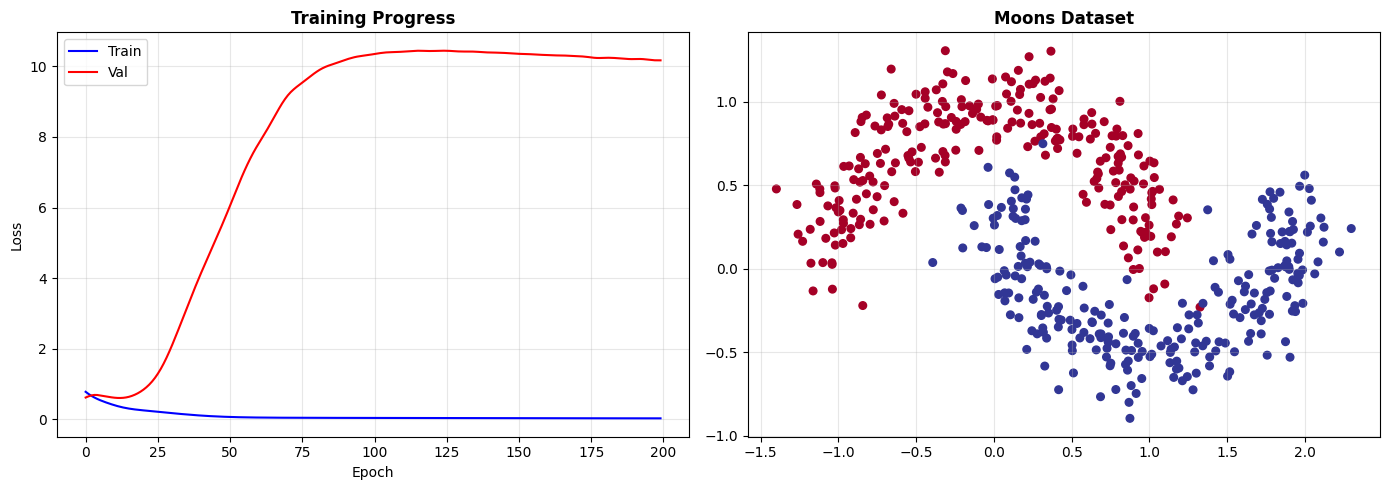

In [ ]:
import jax
import jax.numpy as jnp
from jax import random, jit, value_and_grad
import matplotlib.pyplot as plt
from typing import Sequence
from flax import linen as nn
from flax.training import train_state
import optax

# ============================================================================
#                   HELPER DEFINITIONS
# ============================================================================

def binary_cross_entropy(y_pred, y_true):
    """Binary Cross-Entropy Loss"""
    epsilon = 1e-7
    y_pred = jnp.clip(y_pred, epsilon, 1 - epsilon)
    return -jnp.mean(y_true * jnp.log(y_pred) + (1 - y_true) * jnp.log(1 - y_pred))

class FlexibleMLP(nn.Module):
    """Flexible MLP with configurable architecture."""
    features: Sequence[int]
    activation: str = 'relu'

    @nn.compact
    def __call__(self, x, training: bool = True):
        activations = {
            'relu': nn.relu,
            'tanh': nn.tanh,
            'sigmoid': nn.sigmoid,
            'gelu': nn.gelu,
        }
        act_fn = activations[self.activation]

        for i, feat in enumerate(self.features[:-1]):
            x = nn.Dense(feat)(x)
            x = act_fn(x)

        # Output layer (no activation)
        x = nn.Dense(self.features[-1])(x)
        return x

def create_train_state(model, key, input_shape, learning_rate):
    """Create initial training state."""
    params = model.init(key, jnp.ones(input_shape))
    tx = optax.adam(learning_rate)
    return train_state.TrainState.create(
        apply_fn=model.apply,
        params=params,
        tx=tx
    )

@jit
def train_step_flax(state, batch_x, batch_y):
    """Single training step."""
    def loss_fn(params):
        logits = state.apply_fn(params, batch_x)
        pred = jax.nn.sigmoid(logits)
        return binary_cross_entropy(pred, batch_y)

    loss, grads = value_and_grad(loss_fn)(state.params)
    state = state.apply_gradients(grads=grads)
    return state, loss

# ============================================================================
#                   DEMO: MOONS CLASSIFICATION
# ============================================================================

print("=" * 60)
print("           DEMO: MOONS CLASSIFICATION")
print("=" * 60)

# Generate moons dataset
def make_moons_jax(n_samples=500, noise=0.1, key=None):
    if key is None:
        key = random.PRNGKey(0)

    n_per_class = n_samples // 2

    # Moon 1
    theta1 = jnp.linspace(0, jnp.pi, n_per_class)
    x1 = jnp.stack([jnp.cos(theta1), jnp.sin(theta1)], axis=1)

    # Moon 2
    theta2 = jnp.linspace(0, jnp.pi, n_per_class)
    x2 = jnp.stack([1 - jnp.cos(theta2), 0.5 - jnp.sin(theta2)], axis=1)

    X = jnp.concatenate([x1, x2]) + noise * random.normal(key, (n_samples, 2))
    y = jnp.concatenate([jnp.zeros(n_per_class), jnp.ones(n_per_class)])[:, None]

    return X, y

# Data
key = random.PRNGKey(0)
X_moons, y_moons = make_moons_jax(500, noise=0.15, key=key)

# Split
X_train, X_val = X_moons[:400], X_moons[400:]
y_train, y_val = y_moons[:400], y_moons[400:]

# Model
model = FlexibleMLP(features=[32, 16, 1], activation='relu')

# Training state
key = random.PRNGKey(42)
state = create_train_state(model, key, (1, 2), learning_rate=0.01)

# Train
print("\nTraining...\n")
history = {'loss': [], 'val_loss': []}

for epoch in range(200):
    state, train_loss = train_step_flax(state, X_train, y_train)
    history['loss'].append(float(train_loss))

    # Validation loss
    val_logits = state.apply_fn(state.params, X_val)
    val_pred = jax.nn.sigmoid(val_logits)
    val_loss = binary_cross_entropy(val_pred, y_val)
    history['val_loss'].append(float(val_loss))

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1:3d} | Train: {train_loss:.4f} | Val: {val_loss:.4f}")

# Accuracy
val_logits = state.apply_fn(state.params, X_val)
val_pred = (jax.nn.sigmoid(val_logits) > 0.5).astype(jnp.float32)
accuracy = (val_pred == y_val).mean()
print(f"\nValidation Accuracy: {accuracy*100:.2f}%")

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(history['loss'], 'b-', label='Train')
ax[0].plot(history['val_loss'], 'r-', label='Val')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Progress', fontweight='bold')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

ax[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons.flatten(), cmap='RdYlBu', s=30)
ax[1].set_title('Moons Dataset', fontweight='bold')
ax[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

           DEMO: XOR WITH FLAX

Training...

Epoch  100 | Loss: 0.001520
Epoch  200 | Loss: 0.000749
Epoch  300 | Loss: 0.000442
Epoch  400 | Loss: 0.000282
Epoch  500 | Loss: 0.000194
Epoch  600 | Loss: 0.000143
Epoch  700 | Loss: 0.000112
Epoch  800 | Loss: 0.000090
Epoch  900 | Loss: 0.000075
Epoch 1000 | Loss: 0.000063

----------------------------------------
PREDICTIONS
----------------------------------------
Input: [0.0, 0.0] | True: 0 | Pred: 0.0000 | Rounded: 0
Input: [0.0, 1.0] | True: 1 | Pred: 0.9999 | Rounded: 1
Input: [1.0, 0.0] | True: 1 | Pred: 1.0000 | Rounded: 1
Input: [1.0, 1.0] | True: 0 | Pred: 0.0001 | Rounded: 0


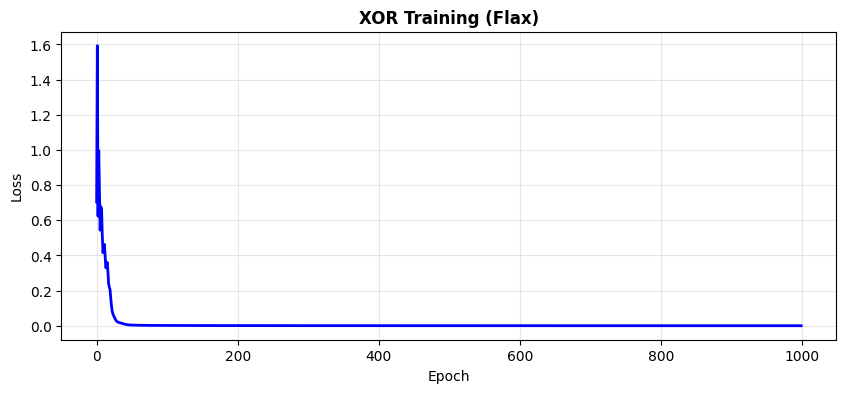

In [ ]:
# ============================================================================
#                    DEMO: XOR WITH FLAX
# ============================================================================

print("=" * 60)
print("           DEMO: XOR WITH FLAX")
print("=" * 60)

# Data
X_xor = jnp.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y_xor = jnp.array([[0.], [1.], [1.], [0.]])

# Model
model = FlexibleMLP(features=[8, 1], activation='tanh')

# Create training state
key = random.PRNGKey(42)
state = create_train_state(model, key, (1, 2), learning_rate=0.5)

# Training loop
print("\nTraining...\n")
history = {'loss': []}

for epoch in range(1000):
    state, loss = train_step_flax(state, X_xor, y_xor)
    history['loss'].append(float(loss))

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1:4d} | Loss: {loss:.6f}")

# Predictions
print("\n" + "-"*40)
print("PREDICTIONS")
print("-"*40)

logits = state.apply_fn(state.params, X_xor)
predictions = jax.nn.sigmoid(logits)

for x, y_true, y_pred in zip(X_xor, y_xor, predictions):
    print(f"Input: {x.tolist()} | True: {int(y_true[0])} | "
          f"Pred: {y_pred[0]:.4f} | Rounded: {int(y_pred[0] > 0.5)}")

# Plot
plt.figure(figsize=(10, 4))
plt.plot(history['loss'], 'b-', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('XOR Training (Flax)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# ============================================================================
#                 COMPLETE FLAX TRAINING PIPELINE
# ============================================================================

print("=" * 60)
print("       COMPLETE FLAX TRAINING PIPELINE")
print("=" * 60)

class FlexibleMLP(nn.Module):
    """Flexible MLP with configurable architecture."""
    features: Sequence[int]
    activation: str = 'relu'

    @nn.compact
    def __call__(self, x, training: bool = True):
        activations = {
            'relu': nn.relu,
            'tanh': nn.tanh,
            'sigmoid': nn.sigmoid,
            'gelu': nn.gelu,
        }
        act_fn = activations[self.activation]

        for i, feat in enumerate(self.features[:-1]):
            x = nn.Dense(feat)(x)
            x = act_fn(x)

        # Output layer (no activation)
        x = nn.Dense(self.features[-1])(x)
        return x

def create_train_state(model, key, input_shape, learning_rate):
    """Create initial training state."""
    params = model.init(key, jnp.ones(input_shape))
    tx = optax.adam(learning_rate)
    return train_state.TrainState.create(
        apply_fn=model.apply,
        params=params,
        tx=tx
    )

@jit
def train_step_flax(state, batch_x, batch_y):
    """Single training step."""
    def loss_fn(params):
        logits = state.apply_fn(params, batch_x)
        pred = jax.nn.sigmoid(logits)
        return binary_cross_entropy(pred, batch_y)

    loss, grads = value_and_grad(loss_fn)(state.params)
    state = state.apply_gradients(grads=grads)
    return state, loss

print("Flax training pipeline ready!")
print("\nTrainState contains:")
print("   - params: Model parameters")
print("   - apply_fn: Forward pass function")
print("   - tx: Optimizer")
print("   - step: Training step counter")

       COMPLETE FLAX TRAINING PIPELINE
Flax training pipeline ready!

TrainState contains:
   - params: Model parameters
   - apply_fn: Forward pass function
   - tx: Optimizer
   - step: Training step counter


In [ ]:
# ============================================================================
#                    OPTAX: OPTIMIZERS FOR JAX
# ============================================================================

print("=" * 60)
print("       OPTAX: OPTIMIZERS FOR JAX")
print("=" * 60)

# Optax provides optimizers that work with JAX's functional style

print("\nAvailable optimizers in Optax:")
optimizers_demo = {
    'SGD': optax.sgd(learning_rate=0.01),
    'SGD+Momentum': optax.sgd(learning_rate=0.01, momentum=0.9),
    'Adam': optax.adam(learning_rate=0.001),
    'AdamW': optax.adamw(learning_rate=0.001, weight_decay=0.01),
    'RMSprop': optax.rmsprop(learning_rate=0.01),
}

for name in optimizers_demo:
    print(f"   - optax.{name.lower().replace('+', '_')}()")

print("\nOptax pattern:")
print("   1. optimizer = optax.adam(lr)")
print("   2. opt_state = optimizer.init(params)")
print("   3. grads = jax.grad(loss)(params)")
print("   4. updates, opt_state = optimizer.update(grads, opt_state)")
print("   5. params = optax.apply_updates(params, updates)")

       OPTAX: OPTIMIZERS FOR JAX

Available optimizers in Optax:
   - optax.sgd()
   - optax.sgd_momentum()
   - optax.adam()
   - optax.adamw()
   - optax.rmsprop()

Optax pattern:
   1. optimizer = optax.adam(lr)
   2. opt_state = optimizer.init(params)
   3. grads = jax.grad(loss)(params)
   4. updates, opt_state = optimizer.update(grads, opt_state)
   5. params = optax.apply_updates(params, updates)


In [ ]:
# ============================================================================
#                    FLAX LINEN: BASIC MODULE
# ============================================================================

print("=" * 60)
print("       FLAX LINEN: BASIC MODULE")
print("=" * 60)

# Flax uses nn.Module with @nn.compact decorator
# This is similar to PyTorch's nn.Module

class SimpleMLP(nn.Module):
    """Simple MLP using Flax Linen."""
    hidden_size: int = 64
    output_size: int = 1

    @nn.compact
    def __call__(self, x):
        # nn.Dense is like PyTorch's nn.Linear
        x = nn.Dense(self.hidden_size)(x)
        x = nn.relu(x)
        x = nn.Dense(self.output_size)(x)
        return x

# Create model instance (just a blueprint, no parameters yet!)
model = SimpleMLP(hidden_size=32, output_size=1)

# Initialize parameters
key = random.PRNGKey(0)
dummy_input = jnp.ones((1, 2))  # Batch of 1, 2 features

# model.init() creates parameters
params = model.init(key, dummy_input)

print("Model created!")
print(f"\nParameter structure:")
print(jax.tree.map(lambda x: x.shape, params))

# Forward pass with model.apply()
output = model.apply(params, dummy_input)
print(f"\nInput shape:  {dummy_input.shape}")
print(f"Output shape: {output.shape}")

       FLAX LINEN: BASIC MODULE
Model created!

Parameter structure:
{'params': {'Dense_0': {'bias': (32,), 'kernel': (2, 32)}, 'Dense_1': {'bias': (1,), 'kernel': (32, 1)}}}

Input shape:  (1, 2)
Output shape: (1, 1)


---

# Part VI: High-Level API with Flax Linen

## From Primitives to Production

**Flax** is Google's neural network library for JAX. **Linen** is its modern API.

| Primitive Approach | Flax Linen |
|-------------------|------------|
| Manual param dicts | `nn.Module` classes |
| Manual init functions | `model.init(key, x)` |
| Manual forward pass | `model.apply(params, x)` |
| Manual param updates | Optax optimizers |

```python
# Flax Linen style
class MLP(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = nn.Dense(64)(x)
        x = nn.relu(x)
        x = nn.Dense(10)(x)
        return x
```

        TEST: XOR PROBLEM (Primitive Network)

Network: 2 -> 8 -> 1
Activation: tanh
Loss: Binary Cross-Entropy

Training...

Epoch  100/1000 | Loss: 0.084956
Epoch  200/1000 | Loss: 0.029329
Epoch  300/1000 | Loss: 0.016701
Epoch  400/1000 | Loss: 0.011404
Epoch  500/1000 | Loss: 0.008546
Epoch  600/1000 | Loss: 0.006778
Epoch  700/1000 | Loss: 0.005583
Epoch  800/1000 | Loss: 0.004727
Epoch  900/1000 | Loss: 0.004086
Epoch 1000/1000 | Loss: 0.003588

----------------------------------------
PREDICTIONS
----------------------------------------
Input: [0.0, 0.0] | True: 0 | Pred: 0.0017 | Rounded: 0
Input: [0.0, 1.0] | True: 1 | Pred: 0.9963 | Rounded: 1
Input: [1.0, 0.0] | True: 1 | Pred: 0.9963 | Rounded: 1
Input: [1.0, 1.0] | True: 0 | Pred: 0.0051 | Rounded: 0


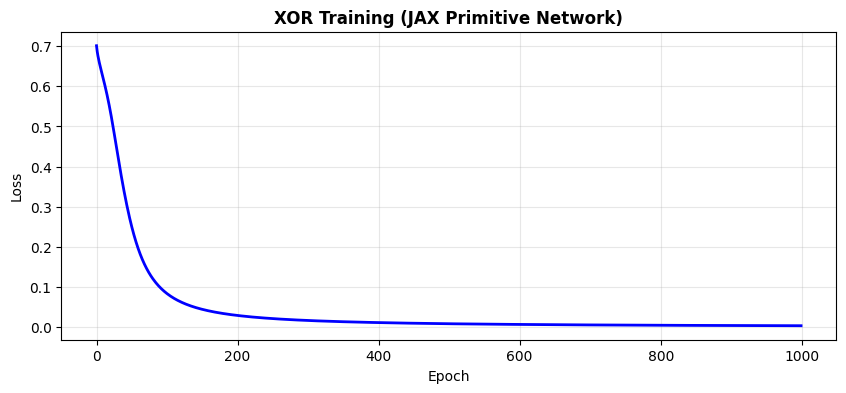

In [ ]:
import jax.numpy as jnp
from jax import random, jit, value_and_grad, grad
from typing import List, Dict

# ============================================================================
#          NEURAL NETWORK FROM SCRATCH (JAX Primitives Only)
# ============================================================================

def init_mlp_params(layer_sizes: List[int], key) -> Dict:
    """
    Initialize MLP parameters using He initialization.

    Returns a PyTree (nested dict) of parameters.
    """
    params = []
    keys = random.split(key, len(layer_sizes) - 1)

    for i, (n_in, n_out) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        key_w, key_b = random.split(keys[i])
        # He initialization
        W = random.normal(key_w, (n_in, n_out)) * jnp.sqrt(2.0 / n_in)
        b = jnp.zeros(n_out)
        params.append({'W': W, 'b': b})

    return params

def mlp_forward(params, x, activation='relu'):
    """
    Forward pass through MLP.

    params: List of layer dicts with 'W' and 'b'
    x: Input array
    activation: 'relu', 'tanh', or 'sigmoid'
    """
    activations = {
        'relu': jax.nn.relu,
        'tanh': jnp.tanh,
        'sigmoid': jax.nn.sigmoid
    }
    act_fn = activations[activation]

    # Hidden layers with activation
    for layer_params in params[:-1]:
        x = x @ layer_params['W'] + layer_params['b']
        x = act_fn(x)

    # Output layer (no activation)
    x = x @ params[-1]['W'] + params[-1]['b']
    return x

# ============================================================================
#              LOSS FUNCTIONS (JAX Primitive Style)
# ============================================================================

def mse_loss(y_pred, y_true):
    """Mean Squared Error Loss"""
    return jnp.mean((y_pred - y_true) ** 2)

def binary_cross_entropy(y_pred, y_true):
    """Binary Cross-Entropy Loss"""
    epsilon = 1e-7
    y_pred = jnp.clip(y_pred, epsilon, 1 - epsilon)
    return -jnp.mean(y_true * jnp.log(y_pred) + (1 - y_true) * jnp.log(1 - y_pred))

def categorical_cross_entropy(y_pred, y_true):
    """Categorical Cross-Entropy Loss"""
    epsilon = 1e-7
    y_pred = jnp.clip(y_pred, epsilon, 1 - epsilon)
    return -jnp.mean(jnp.sum(y_true * jnp.log(y_pred), axis=-1))

# ============================================================================
#                    TRAINING LOOP (Functional Style)
# ============================================================================

def create_train_step(loss_fn, learning_rate):
    """
    Create a JIT-compiled training step function.

    This is the JAX pattern for efficient training.
    """
    @jit
    def train_step(params, x, y):
        loss, grads = value_and_grad(loss_fn)(params, x, y)

        # Update parameters (SGD)
        new_params = jax.tree.map(
            lambda p, g: p - learning_rate * g,
            params, grads
        )
        return new_params, loss

    return train_step

def train_mlp(params, X, y, epochs=100, learning_rate=0.01,
              loss_type='bce', activation='tanh', verbose=True):
    """
    Train MLP using gradient descent.
    """
    def loss_fn(params, x, y):
        logits = mlp_forward(params, x, activation=activation)
        if loss_type == 'bce':
            pred = jax.nn.sigmoid(logits)
            return binary_cross_entropy(pred, y)
        elif loss_type == 'mse':
            return mse_loss(logits, y)
        elif loss_type == 'cce':
            pred = jax.nn.softmax(logits)
            return categorical_cross_entropy(pred, y)

    train_step = create_train_step(loss_fn, learning_rate)

    history = {'loss': []}

    for epoch in range(epochs):
        params, loss = train_step(params, X, y)
        history['loss'].append(float(loss))

        if verbose and (epoch + 1) % max(1, epochs // 10) == 0:
            print(f"Epoch {epoch+1:4d}/{epochs} | Loss: {loss:.6f}")

    return params, history

# ============================================================================
#                    TEST: XOR PROBLEM (Primitives)
# ============================================================================

print("=" * 60)
print("        TEST: XOR PROBLEM (Primitive Network)")
print("=" * 60)

# XOR dataset
X_xor = jnp.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y_xor = jnp.array([[0.], [1.], [1.], [0.]])

# Initialize network
key = random.PRNGKey(42)
params = init_mlp_params([2, 8, 1], key)

print("\nNetwork: 2 -> 8 -> 1")
print("Activation: tanh")
print("Loss: Binary Cross-Entropy")
print("\nTraining...\n")

# Train
params, history = train_mlp(
    params, X_xor, y_xor,
    epochs=1000,
    learning_rate=0.5,
    loss_type='bce',
    activation='tanh',
    verbose=True
)

# Test predictions
print("\n" + "-"*40)
print("PREDICTIONS")
print("-"*40)

logits = mlp_forward(params, X_xor, activation='tanh')
predictions = jax.nn.sigmoid(logits)

for x, y_true, y_pred in zip(X_xor, y_xor, predictions):
    print(f"Input: {x.tolist()} | True: {int(y_true[0])} | "
          f"Pred: {y_pred[0]:.4f} | Rounded: {int(y_pred[0] > 0.5)}")

# Plot training
plt.figure(figsize=(10, 4))
plt.plot(history['loss'], 'b-', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('XOR Training (JAX Primitive Network)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# ============================================================================
#                    TRAINING LOOP (Functional Style)
# ============================================================================

print("=" * 60)
print("       TRAINING LOOP (Functional Style)")
print("=" * 60)

def create_train_step(loss_fn, learning_rate):
    """
    Create a JIT-compiled training step function.

    This is the JAX pattern for efficient training.
    """
    @jit
    def train_step(params, x, y):
        loss, grads = value_and_grad(loss_fn)(params, x, y)

        # Update parameters (SGD)
        new_params = jax.tree.map(
            lambda p, g: p - learning_rate * g,
            params, grads
        )
        return new_params, loss

    return train_step

def train_mlp(params, X, y, epochs=100, learning_rate=0.01,
              loss_type='bce', activation='tanh', verbose=True):
    """
    Train MLP using gradient descent.
    """
    def loss_fn(params, x, y):
        logits = mlp_forward(params, x, activation=activation)
        if loss_type == 'bce':
            pred = jax.nn.sigmoid(logits)
            return binary_cross_entropy(pred, y)
        elif loss_type == 'mse':
            return mse_loss(logits, y)
        elif loss_type == 'cce':
            pred = jax.nn.softmax(logits)
            return categorical_cross_entropy(pred, y)

    train_step = create_train_step(loss_fn, learning_rate)

    history = {'loss': []}

    for epoch in range(epochs):
        params, loss = train_step(params, X, y)
        history['loss'].append(float(loss))

        if verbose and (epoch + 1) % max(1, epochs // 10) == 0:
            print(f"Epoch {epoch+1:4d}/{epochs} | Loss: {loss:.6f}")

    return params, history

print("Training functions defined!")
print("\nKey JAX patterns:")
print("  1. Pure functions: params in, params out")
print("  2. jax.tree.map: Update all params at once")
print("  3. @jit: Compile for speed")
print("  4. value_and_grad: Get loss and gradients together")

       TRAINING LOOP (Functional Style)
Training functions defined!

Key JAX patterns:
  1. Pure functions: params in, params out
  2. jax.tree.map: Update all params at once
  3. @jit: Compile for speed
  4. value_and_grad: Get loss and gradients together


In [ ]:
# ============================================================================
#          NEURAL NETWORK FROM SCRATCH (JAX Primitives Only)
# ============================================================================

print("=" * 60)
print("    NEURAL NETWORK (JAX Primitives Only)")
print("=" * 60)

def init_mlp_params(layer_sizes: List[int], key) -> Dict:
    """
    Initialize MLP parameters using He initialization.

    Returns a PyTree (nested dict) of parameters.
    """
    params = []
    keys = random.split(key, len(layer_sizes) - 1)

    for i, (n_in, n_out) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        key_w, key_b = random.split(keys[i])
        # He initialization
        W = random.normal(key_w, (n_in, n_out)) * jnp.sqrt(2.0 / n_in)
        b = jnp.zeros(n_out)
        params.append({'W': W, 'b': b})

    return params

def mlp_forward(params, x, activation='relu'):
    """
    Forward pass through MLP.

    params: List of layer dicts with 'W' and 'b'
    x: Input array
    activation: 'relu', 'tanh', or 'sigmoid'
    """
    activations = {
        'relu': jax.nn.relu,
        'tanh': jnp.tanh,
        'sigmoid': jax.nn.sigmoid
    }
    act_fn = activations[activation]

    # Hidden layers with activation
    for layer_params in params[:-1]:
        x = x @ layer_params['W'] + layer_params['b']
        x = act_fn(x)

    # Output layer (no activation)
    x = x @ params[-1]['W'] + params[-1]['b']
    return x

# Test the network
key = random.PRNGKey(42)
layer_sizes = [2, 8, 4, 1]  # 2 inputs, 8 hidden, 4 hidden, 1 output

params = init_mlp_params(layer_sizes, key)

print("\nNetwork architecture:", layer_sizes)
print("\nParameter shapes:")
for i, p in enumerate(params):
    print(f"   Layer {i+1}: W={p['W'].shape}, b={p['b'].shape}")

# Test forward pass
X_test = jnp.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
output = mlp_forward(params, X_test, activation='relu')
print(f"\nTest input shape: {X_test.shape}")
print(f"Output shape: {output.shape}")
print(f"Output:\n{output}")

    NEURAL NETWORK (JAX Primitives Only)

Network architecture: [2, 8, 4, 1]

Parameter shapes:
   Layer 1: W=(2, 8), b=(8,)
   Layer 2: W=(8, 4), b=(4,)
   Layer 3: W=(4, 1), b=(1,)

Test input shape: (4, 2)
Output shape: (4, 1)
Output:
[[ 0.        ]
 [-0.25850728]
 [-0.47780377]
 [-0.23346055]]


In [ ]:
# ============================================================================
#              LOSS FUNCTIONS (JAX Primitive Style)
# ============================================================================

print("=" * 60)
print("         LOSS FUNCTIONS (Primitive Style)")
print("=" * 60)

def mse_loss(y_pred, y_true):
    """Mean Squared Error Loss"""
    return jnp.mean((y_pred - y_true) ** 2)

def binary_cross_entropy(y_pred, y_true):
    """Binary Cross-Entropy Loss"""
    epsilon = 1e-7
    y_pred = jnp.clip(y_pred, epsilon, 1 - epsilon)
    return -jnp.mean(y_true * jnp.log(y_pred) + (1 - y_true) * jnp.log(1 - y_pred))

def categorical_cross_entropy(y_pred, y_true):
    """Categorical Cross-Entropy Loss"""
    epsilon = 1e-7
    y_pred = jnp.clip(y_pred, epsilon, 1 - epsilon)
    return -jnp.mean(jnp.sum(y_true * jnp.log(y_pred), axis=-1))

# Test
y_pred = jnp.array([0.9, 0.1, 0.8])
y_true = jnp.array([1.0, 0.0, 1.0])

print(f"\ny_pred: {y_pred}")
print(f"y_true: {y_true}")
print(f"MSE Loss: {mse_loss(y_pred, y_true):.6f}")
print(f"BCE Loss: {binary_cross_entropy(y_pred, y_true):.6f}")

         LOSS FUNCTIONS (Primitive Style)

y_pred: [0.9 0.1 0.8]
y_true: [1. 0. 1.]
MSE Loss: 0.020000
BCE Loss: 0.144622


In [ ]:
# ============================================================================
#            ACTIVATION FUNCTIONS (JAX Primitive Style)
# ============================================================================

print("=" * 60)
print("       ACTIVATION FUNCTIONS (Primitive Style)")
print("=" * 60)

# Pure functions - no classes needed!
# JAX's autodiff handles gradients automatically

def sigmoid(x):
    """Sigmoid activation: 1 / (1 + exp(-x))"""
    return 1 / (1 + jnp.exp(-jnp.clip(x, -500, 500)))

def tanh(x):
    """Hyperbolic tangent activation"""
    return jnp.tanh(x)

def relu(x):
    """Rectified Linear Unit: max(0, x)"""
    return jnp.maximum(x, 0)

def leaky_relu(x, alpha=0.01):
    """Leaky ReLU: x if x > 0 else alpha * x"""
    return jnp.where(x > 0, x, alpha * x)

def softmax(x, axis=-1):
    """Softmax: exp(x) / sum(exp(x))"""
    exp_x = jnp.exp(x - x.max(axis=axis, keepdims=True))
    return exp_x / exp_x.sum(axis=axis, keepdims=True)

# Test
x = jnp.linspace(-3, 3, 7)
print(f"\nInput:        {x}")
print(f"sigmoid(x):   {sigmoid(x)}")
print(f"relu(x):      {relu(x)}")
print(f"leaky_relu:   {leaky_relu(x)}")

# Note: JAX also provides these in jax.nn
print("\n JAX provides built-in activations in jax.nn:")
print(f"   jax.nn.relu(x):    {jax.nn.relu(x)}")
print(f"   jax.nn.sigmoid(x): {jax.nn.sigmoid(x)}")

       ACTIVATION FUNCTIONS (Primitive Style)

Input:        [-3.        -2.        -0.9999999  0.         1.         2.
  3.       ]
sigmoid(x):   [0.04742587 0.11920292 0.26894143 0.5        0.7310586  0.880797
 0.95257413]
relu(x):      [0. 0. 0. 0. 1. 2. 3.]
leaky_relu:   [-0.03 -0.02 -0.01  0.    1.    2.    3.  ]

 JAX provides built-in activations in jax.nn:
   jax.nn.relu(x):    [0. 0. 0. 0. 1. 2. 3.]
   jax.nn.sigmoid(x): [0.04742587 0.11920292 0.26894143 0.5        0.7310586  0.880797
 0.95257413]


---

# Part V: Neural Network from Scratch (JAX Primitives)

## Pure Functional Neural Networks

JAX requires a **functional programming** style:
- **No mutable state**: Parameters are passed explicitly
- **Pure functions**: Same inputs = same outputs
- **PyTrees for parameters**: Nested dicts/lists of arrays

```python
# PyTorch style (stateful)
model = Model()
output = model(x)  # Parameters hidden inside model

# JAX style (functional)
params = init_params(key)
output = forward(params, x)  # Parameters passed explicitly
```

This enables powerful transformations like `vmap`, `jit`, and `grad`!

       GRADIENT DESCENT IN ACTION
Starting x: -2.00
Final x:    2.9923 (target: 3.0)
Final f(x): 1.000060 (minimum: 1.0)


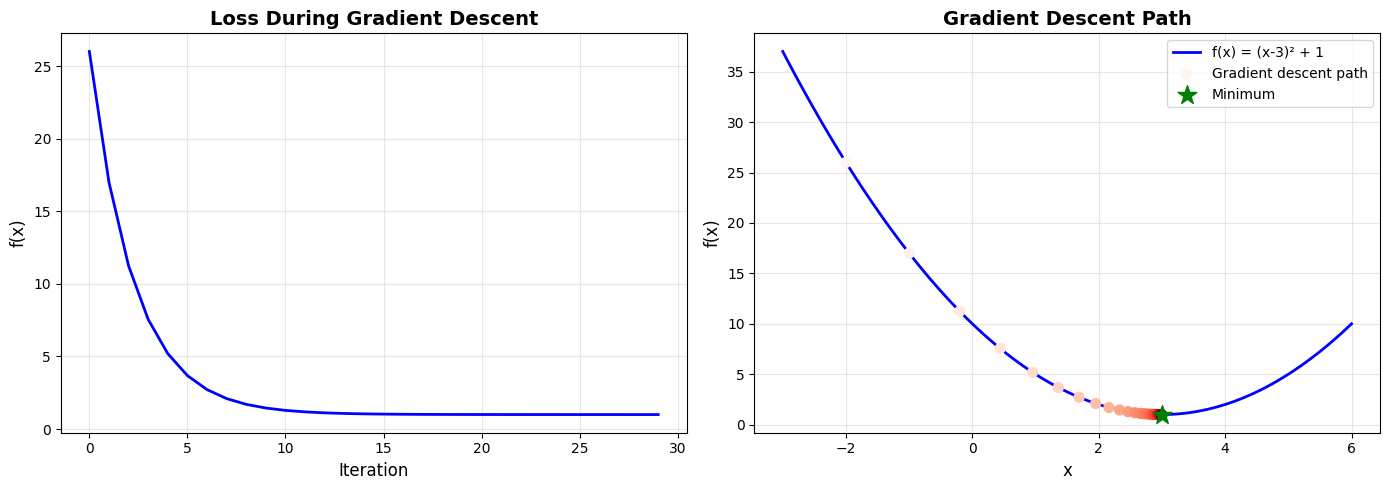

In [ ]:
# ============================================================================
#                    GRADIENT DESCENT IN ACTION
# ============================================================================

import numpy as np # Added import for numpy

print("=" * 60)
print("       GRADIENT DESCENT IN ACTION")
print("=" * 60)

# Minimize f(x) = (x - 3)^2 + 1
# Minimum at x = 3

@jit
def f(x):
    return (x - 3) ** 2 + 1

grad_f = jit(grad(f))

x = jnp.array(-2.0)
learning_rate = 0.1

history = {'x': [], 'f': []}

for i in range(30):
    history['x'].append(float(x))
    history['f'].append(float(f(x)))

    # Gradient descent step
    x = x - learning_rate * grad_f(x)

print(f"Starting x: {history['x'][0]:.2f}")
print(f"Final x:    {history['x'][-1]:.4f} (target: 3.0)")
print(f"Final f(x): {history['f'][-1]:.6f} (minimum: 1.0)")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history['f'], 'b-', linewidth=2)
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_title('Loss During Gradient Descent', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

x_range = np.linspace(-3, 6, 100)
f_range = (x_range - 3) ** 2 + 1
ax2.plot(x_range, f_range, 'b-', linewidth=2, label='f(x) = (x-3)² + 1')
ax2.scatter(history['x'], history['f'], c=range(len(history['x'])),
            cmap='Reds', s=50, zorder=5, label='Gradient descent path')
ax2.scatter([3], [1], c='green', s=200, marker='*', zorder=6, label='Minimum')
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f(x)', fontsize=12)
ax2.set_title('Gradient Descent Path', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
#                GRADIENTS WITH PYTREES (NESTED STRUCTURES)
# ============================================================================

print("=" * 60)
print("       GRADIENTS WITH PYTREES")
print("=" * 60)

# JAX can differentiate through nested Python structures (PyTrees)
# This is how neural network parameters work!

def neural_net_loss(params, x, y):
    """Loss for a simple 2-layer network."""
    # Layer 1
    h = jnp.tanh(x @ params['w1'] + params['b1'])
    # Layer 2 (output)
    pred = h @ params['w2'] + params['b2']
    # MSE loss
    return jnp.mean((pred - y) ** 2)

# Initialize parameters as a nested dict
key = random.PRNGKey(0)
keys = random.split(key, 4)

params = {
    'w1': random.normal(keys[0], (2, 4)) * 0.1,
    'b1': jnp.zeros(4),
    'w2': random.normal(keys[1], (4, 1)) * 0.1,
    'b2': jnp.zeros(1)
}

# Sample data
X = random.normal(keys[2], (10, 2))
y = random.normal(keys[3], (10, 1))

# grad works on the entire PyTree!
grads = grad(neural_net_loss)(params, X, y)

print("Parameters structure:")
for key, val in params.items():
    print(f"   {key}: shape {val.shape}")

print("\nGradients (same structure!):")
for key, val in grads.items():
    print(f"   d_loss/d_{key}: shape {val.shape}")

print("\n JAX automatically handles nested dicts, lists, tuples!")
print("   This is called 'PyTree' support.")

       GRADIENTS WITH PYTREES
Parameters structure:
   w1: shape (2, 4)
   b1: shape (4,)
   w2: shape (4, 1)
   b2: shape (1,)

Gradients (same structure!):
   d_loss/d_b1: shape (4,)
   d_loss/d_b2: shape (1,)
   d_loss/d_w1: shape (2, 4)
   d_loss/d_w2: shape (4, 1)

 JAX automatically handles nested dicts, lists, tuples!
   This is called 'PyTree' support.


In [ ]:
# ============================================================================
#                   VALUE_AND_GRAD: GET BOTH AT ONCE
# ============================================================================

print("=" * 60)
print("       VALUE_AND_GRAD: GET BOTH AT ONCE")
print("=" * 60)

# Often we need BOTH the function value AND the gradient
# value_and_grad is more efficient than calling f() and grad(f)() separately

def loss_fn(w, x, y):
    """Mean squared error loss."""
    pred = w * x
    return jnp.mean((pred - y) ** 2)

# Get both value and gradient
loss_and_grad = value_and_grad(loss_fn)

w = jnp.array(1.0)
x = jnp.array([1., 2., 3., 4., 5.])
y = jnp.array([2., 4., 6., 8., 10.])

loss, grad_w = loss_and_grad(w, x, y)

print(f"\nw = {w}")
print(f"Loss = {loss:.4f}")
print(f"dL/dw = {grad_w:.4f}")

# This is the typical pattern for training!
print("\n This is more efficient than:")
print("   loss = loss_fn(w, x, y)")
print("   grad_w = grad(loss_fn)(w, x, y)")
print("   Because value_and_grad shares computation.")

       VALUE_AND_GRAD: GET BOTH AT ONCE

w = 1.0
Loss = 11.0000
dL/dw = -22.0000

 This is more efficient than:
   loss = loss_fn(w, x, y)
   grad_w = grad(loss_fn)(w, x, y)
   Because value_and_grad shares computation.


In [ ]:
# ============================================================================
#                     GRAD: BASIC DIFFERENTIATION
# ============================================================================

print("=" * 60)
print("       GRAD: BASIC DIFFERENTIATION")
print("=" * 60)

# Simple scalar function
def f(x):
    """f(x) = x^2 + 3x + 1"""
    return x ** 2 + 3 * x + 1

# grad returns a NEW function that computes the derivative
df = grad(f)  # df/dx = 2x + 3

print("\nFunction: f(x) = x^2 + 3x + 1")
print("Derivative: df/dx = 2x + 3")

x = 2.0
print(f"\nAt x = {x}:")
print(f"   f(x)  = {f(x)}")
print(f"   df/dx = {df(x)} (expected: {2*x + 3})")

# Higher-order derivatives - just apply grad again!
print("\nHigher-order derivatives:")
d2f = grad(grad(f))  # d²f/dx² = 2
d3f = grad(grad(grad(f)))  # d³f/dx³ = 0

print(f"   d²f/dx² = {d2f(x)} (expected: 2)")
print(f"   d³f/dx³ = {d3f(x)} (expected: 0)")

       GRAD: BASIC DIFFERENTIATION

Function: f(x) = x^2 + 3x + 1
Derivative: df/dx = 2x + 3

At x = 2.0:
   f(x)  = 11.0
   df/dx = 7.0 (expected: 7.0)

Higher-order derivatives:
   d²f/dx² = 2.0 (expected: 2)
   d³f/dx³ = 0.0 (expected: 0)


---

# Part IV: Automatic Differentiation - JAX's Core Power

## `grad`, `value_and_grad`, Jacobians, and Hessians

JAX's automatic differentiation is:
- **Functional**: `grad(f)` returns a NEW function
- **Composable**: `grad(grad(f))` gives second derivatives
- **Flexible**: Forward-mode, reverse-mode, or mixed

```python
# f(x) = x^2
f = lambda x: x ** 2

# df/dx = 2x
df = grad(f)

# d²f/dx² = 2
d2f = grad(grad(f))
```

# From NumPy to JAX: A Complete Deep Learning Journey

## Master JAX from First Principles to Production-Ready Code

---

In the previous notebooks, we built neural networks **from scratch with NumPy** and learned **PyTorch**. Now we'll learn **JAX** - Google's high-performance machine learning framework that powers cutting-edge research at DeepMind, Google Brain, and beyond.

### Why JAX?

| Feature | NumPy | PyTorch | JAX |
|---------|-------|---------|-----|
| NumPy-compatible API | Native | Similar | Almost identical |
| Automatic Differentiation | Manual | autograd | `jax.grad` |
| GPU/TPU Acceleration | No | CUDA | XLA (GPU/TPU) |
| JIT Compilation | No | TorchScript | `jax.jit` (native) |
| Vectorization | Manual | Manual | `jax.vmap` (automatic) |
| Functional Programming | No | No | Pure functions |
| Composable Transforms | No | Limited | `grad`, `jit`, `vmap`, `pmap` |

### What You'll Learn

| Part | Topic | Key Concepts |
|------|-------|-------------|
| **I** | JAX Fundamentals | Arrays, dtypes, devices, NumPy compatibility |
| **II** | Transformations | `jit`, `vmap`, `pmap` - JAX's superpowers |
| **III** | Einstein Summation | `jnp.einsum` - tensor operations |
| **IV** | Automatic Differentiation | `grad`, `value_and_grad`, Jacobians, Hessians |
| **V** | From Scratch (Primitives) | Build NN using only JAX ops |
| **VI** | High-Level API | Flax Linen, Optax optimizers |
| **VII** | Complete Training | Functional training loops, best practices |

---

*"JAX is NumPy on accelerators with automatic differentiation and XLA compilation."*

In [ ]:
# ============================================================================
#                           SETUP & IMPORTS
# ============================================================================

# Install JAX ecosystem (run this in Colab)
!pip install -q jax jaxlib flax optax

import jax
import jax.numpy as jnp
from jax import grad, jit, vmap, value_and_grad
from jax import random

# Flax for high-level neural networks
import flax
from flax import linen as nn
from flax.training import train_state

# Optax for optimizers
import optax

# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Callable, Any, Sequence

# Beautiful plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Check versions and devices
print(f"JAX Version:   {jax.__version__}")
print(f"Flax Version:  {flax.__version__}")
print(f"Optax Version: {optax.__version__}")
print(f"\nAvailable devices: {jax.devices()}")
print(f"Default backend:   {jax.default_backend()}")

# Set random seed for reproducibility
# JAX uses explicit PRNG keys (functional random number generation)
key = random.PRNGKey(42)
print(f"\nPRNG Key: {key}")

JAX Version:   0.7.2
Flax Version:  0.11.2
Optax Version: 0.2.7

Available devices: [CpuDevice(id=0)]
Default backend:   cpu

PRNG Key: [ 0 42]


---

# Part I: JAX Array Fundamentals

## NumPy with Superpowers

JAX provides `jax.numpy` (usually imported as `jnp`) - a **drop-in replacement** for NumPy that runs on GPU/TPU!

```python
# NumPy
import numpy as np
x = np.array([1, 2, 3])

# JAX (almost identical!)
import jax.numpy as jnp
x = jnp.array([1, 2, 3])
```

### Key Difference: Immutability

JAX arrays are **immutable** - you cannot modify them in place:

```python
# NumPy (works)
x = np.array([1, 2, 3])
x[0] = 999  # OK!

# JAX (doesn't work!)
x = jnp.array([1, 2, 3])
x[0] = 999  # ERROR!
x = x.at[0].set(999)  # Use .at[] instead
```

In [ ]:
# ============================================================================
#                        CREATING JAX ARRAYS
# ============================================================================

print("=" * 60)
print("              CREATING JAX ARRAYS")
print("=" * 60)

# --------------------- From Python Lists ---------------------
print("\n1. From Python Lists:")
arr_from_list = jnp.array([[1, 2, 3], [4, 5, 6]])
print(f"   array: {arr_from_list}")
print(f"   shape: {arr_from_list.shape}")
print(f"   dtype: {arr_from_list.dtype}")

# --------------------- From NumPy Arrays ---------------------
print("\n2. From NumPy Arrays:")
numpy_array = np.array([[1.0, 2.0], [3.0, 4.0]])
jax_from_numpy = jnp.array(numpy_array)
print(f"   NumPy dtype:  {numpy_array.dtype}")
print(f"   JAX dtype:    {jax_from_numpy.dtype}")

# NOTE: Unlike PyTorch, JAX does NOT share memory with NumPy
numpy_array[0, 0] = 999
print(f"   After modifying NumPy: JAX[0,0] = {jax_from_numpy[0, 0]} (independent!)")

# --------------------- Special Arrays ---------------------
print("\n3. Special Arrays:")
zeros = jnp.zeros((2, 3))
ones = jnp.ones((2, 3))
identity = jnp.eye(3)
arange = jnp.arange(0, 10, 2)
linspace = jnp.linspace(0, 1, 5)

print(f"   zeros(2,3):\n{zeros}")
print(f"   eye(3):\n{identity}")
print(f"   arange(0,10,2): {arange}")
print(f"   linspace(0,1,5): {linspace}")

# --------------------- Random Arrays ---------------------
print("\n4. Random Arrays (FUNCTIONAL - needs key):")
key = random.PRNGKey(42)

# Split key for multiple random operations
key, subkey1, subkey2 = random.split(key, 3)

rand_uniform = random.uniform(subkey1, (2, 3))  # Uniform [0, 1)
rand_normal = random.normal(subkey2, (2, 3))    # Standard normal

print(f"   uniform(2,3):\n{rand_uniform}")
print(f"   normal(2,3):\n{rand_normal}")

              CREATING JAX ARRAYS

1. From Python Lists:
   array: [[1 2 3]
 [4 5 6]]
   shape: (2, 3)
   dtype: int32

2. From NumPy Arrays:
   NumPy dtype:  float64
   JAX dtype:    float32
   After modifying NumPy: JAX[0,0] = 1.0 (independent!)

3. Special Arrays:
   zeros(2,3):
[[0. 0. 0.]
 [0. 0. 0.]]
   eye(3):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
   arange(0,10,2): [0 2 4 6 8]
   linspace(0,1,5): [0.   0.25 0.5  0.75 1.  ]

4. Random Arrays (FUNCTIONAL - needs key):
   uniform(2,3):
[[0.72766423 0.78786755 0.18169427]
 [0.26263022 0.11072934 0.20263076]]
   normal(2,3):
[[ 0.4323065   0.5872638  -1.1416743 ]
 [-0.37379906 -0.19910173 -1.7271094 ]]


In [ ]:
# ============================================================================
#                    JAX PRNG: FUNCTIONAL RANDOMNESS
# ============================================================================

print("=" * 60)
print("       JAX PRNG: FUNCTIONAL RANDOMNESS")
print("=" * 60)

# JAX uses EXPLICIT random keys - this ensures reproducibility!
# Unlike NumPy's global state, JAX's randomness is deterministic

print("\n WHY explicit keys?")
print("   - Reproducibility: Same key = same results")
print("   - Parallelism: No race conditions")
print("   - Purity: Functions have no side effects")

# The pattern:
print("\n The PRNG Pattern:")
key = random.PRNGKey(0)  # Initial key
print(f"   Initial key: {key}")

# ALWAYS split before using!
key, subkey = random.split(key)
data1 = random.normal(subkey, (3,))
print(f"   Data 1: {data1}")

key, subkey = random.split(key)
data2 = random.normal(subkey, (3,))
print(f"   Data 2: {data2}")

# If you reuse the same key, you get the same numbers!
print("\n Reusing keys gives same results:")
fixed_key = random.PRNGKey(123)
result1 = random.normal(fixed_key, (3,))
result2 = random.normal(fixed_key, (3,))
print(f"   result1: {result1}")
print(f"   result2: {result2}")
print(f"   Same? {jnp.allclose(result1, result2)}")

# Split into multiple keys at once
print("\n Split into multiple keys:")
key = random.PRNGKey(42)
keys = random.split(key, 5)  # 5 different keys
print(f"   Generated {len(keys)} keys")

       JAX PRNG: FUNCTIONAL RANDOMNESS

 WHY explicit keys?
   - Reproducibility: Same key = same results
   - Parallelism: No race conditions
   - Purity: Functions have no side effects

 The PRNG Pattern:
   Initial key: [0 0]
   Data 1: [-2.4424558  -2.0356805   0.20554423]
   Data 2: [-1.2574776 -0.4016044 -1.1213601]

 Reusing keys gives same results:
   result1: [1.6359469  0.8408094  0.02212393]
   result2: [1.6359469  0.8408094  0.02212393]
   Same? True

 Split into multiple keys:
   Generated 5 keys


In [ ]:
# ============================================================================
#                         DATA TYPES
# ============================================================================

print("=" * 60)
print("              JAX DATA TYPES (dtype)")
print("=" * 60)

# Common dtypes in JAX
dtypes_info = [
    ("jnp.float32", jnp.float32, "Default for neural networks"),
    ("jnp.float64", jnp.float64, "Double precision"),
    ("jnp.float16", jnp.float16, "Half precision, faster on GPU"),
    ("jnp.bfloat16", jnp.bfloat16, "Brain float, good for training"),
    ("jnp.int32", jnp.int32, "Standard integers"),
    ("jnp.int64", jnp.int64, "Long integers"),
    ("jnp.bool_", jnp.bool_, "Boolean for masks"),
]

print(f"\n{'dtype':<20} {'Use Case'}")
print("-" * 50)
for name, dtype, use_case in dtypes_info:
    print(f"{name:<20} {use_case}")

# Converting dtypes
print("\nConverting dtypes:")
x = jnp.array([1.5, 2.7, 3.2])
print(f"   Original (float32): {x}")
print(f"   .astype(jnp.int32): {x.astype(jnp.int32)}")
print(f"   .astype(jnp.float16): {x.astype(jnp.float16)}")

# JAX default is float32 (unlike NumPy's float64)
print("\n Note: JAX defaults to float32, NumPy to float64")
print(f"   jnp.array([1.0]).dtype: {jnp.array([1.0]).dtype}")
print(f"   np.array([1.0]).dtype:  {np.array([1.0]).dtype}")

              JAX DATA TYPES (dtype)

dtype                Use Case
--------------------------------------------------
jnp.float32          Default for neural networks
jnp.float64          Double precision
jnp.float16          Half precision, faster on GPU
jnp.bfloat16         Brain float, good for training
jnp.int32            Standard integers
jnp.int64            Long integers
jnp.bool_            Boolean for masks

Converting dtypes:
   Original (float32): [1.5 2.7 3.2]
   .astype(jnp.int32): [1 2 3]
   .astype(jnp.float16): [1.5 2.7 3.2]

 Note: JAX defaults to float32, NumPy to float64
   jnp.array([1.0]).dtype: float32
   np.array([1.0]).dtype:  float64


In [ ]:
# ============================================================================
#                      DEVICE MANAGEMENT
# ============================================================================

print("=" * 60)
print("              DEVICE MANAGEMENT")
print("=" * 60)

# JAX automatically uses the best available device!
print(f"\nAvailable devices: {jax.devices()}")
print(f"Default backend: {jax.default_backend()}")

# Create array (automatically on best device)
x = jnp.array([1., 2., 3.])
print(f"\nArray device: {x.devices()}")

# Explicit device placement
print("\nExplicit device placement:")
devices = jax.devices()
if len(devices) > 0:
    x_device = jax.device_put(x, devices[0])
    print(f"   Placed on: {x_device.devices()}")

# Transfer to CPU (for NumPy conversion)
print("\nJAX to NumPy:")
jax_arr = jnp.array([1., 2., 3.])
numpy_arr = np.asarray(jax_arr)  # Automatic transfer
print(f"   JAX array:   {jax_arr}")
print(f"   NumPy array: {numpy_arr}")

print("\n Unlike PyTorch, JAX handles device placement automatically!")
print("   No need for .to('cuda') - JAX uses XLA compilation.")

              DEVICE MANAGEMENT

Available devices: [CpuDevice(id=0)]
Default backend: cpu

Array device: {CpuDevice(id=0)}

Explicit device placement:
   Placed on: {CpuDevice(id=0)}

JAX to NumPy:
   JAX array:   [1. 2. 3.]
   NumPy array: [1. 2. 3.]

 Unlike PyTorch, JAX handles device placement automatically!
   No need for .to('cuda') - JAX uses XLA compilation.


In [ ]:
# ============================================================================
#                        ARRAY OPERATIONS
# ============================================================================

print("=" * 60)
print("              ARRAY OPERATIONS")
print("=" * 60)

a = jnp.array([[1., 2.], [3., 4.]])
b = jnp.array([[5., 6.], [7., 8.]])

print(f"\na = \n{a}")
print(f"\nb = \n{b}")

# --------------------- Element-wise Operations ---------------------
print("\n" + "-"*40)
print("Element-wise Operations")
print("-"*40)
print(f"a + b =\n{a + b}")
print(f"a * b =\n{a * b}")  # Element-wise!
print(f"a ** 2 =\n{a ** 2}")
print(f"jnp.sqrt(a) =\n{jnp.sqrt(a)}")
print(f"jnp.exp(a) =\n{jnp.exp(a)}")

# --------------------- Matrix Operations ---------------------
print("\n" + "-"*40)
print("Matrix Operations")
print("-"*40)

print(f"a @ b (matrix multiply) =\n{a @ b}")
print(f"a.T (transpose) =\n{a.T}")
print(f"jnp.linalg.inv(a) =\n{jnp.linalg.inv(a)}")

# --------------------- Reduction Operations ---------------------
print("\n" + "-"*40)
print("Reduction Operations")
print("-"*40)
print(f"a.sum() = {a.sum()}")
print(f"a.sum(axis=0) = {a.sum(axis=0)}  # sum over rows")
print(f"a.sum(axis=1) = {a.sum(axis=1)}  # sum over cols")
print(f"a.mean() = {a.mean()}")
print(f"a.max() = {a.max()}")
print(f"a.argmax() = {a.argmax()}  # index of max")

              ARRAY OPERATIONS

a = 
[[1. 2.]
 [3. 4.]]

b = 
[[5. 6.]
 [7. 8.]]

----------------------------------------
Element-wise Operations
----------------------------------------
a + b =
[[ 6.  8.]
 [10. 12.]]
a * b =
[[ 5. 12.]
 [21. 32.]]
a ** 2 =
[[ 1.  4.]
 [ 9. 16.]]
jnp.sqrt(a) =
[[1.        1.4142135]
 [1.7320508 2.       ]]
jnp.exp(a) =
[[ 2.7182817  7.389056 ]
 [20.085537  54.598152 ]]

----------------------------------------
Matrix Operations
----------------------------------------
a @ b (matrix multiply) =
[[19. 22.]
 [43. 50.]]
a.T (transpose) =
[[1. 3.]
 [2. 4.]]
jnp.linalg.inv(a) =
[[-2.0000002   1.0000001 ]
 [ 1.5000001  -0.50000006]]

----------------------------------------
Reduction Operations
----------------------------------------
a.sum() = 10.0
a.sum(axis=0) = [4. 6.]  # sum over rows
a.sum(axis=1) = [3. 7.]  # sum over cols
a.mean() = 2.5
a.max() = 4.0
a.argmax() = 3  # index of max


In [ ]:
# ============================================================================
#                     IMMUTABILITY & .at[] SYNTAX
# ============================================================================

print("=" * 60)
print("         IMMUTABILITY & .at[] SYNTAX")
print("=" * 60)

# JAX arrays are IMMUTABLE - this is crucial for autodiff!
print("\n JAX arrays are IMMUTABLE:")
print("   x[0] = 999  # This will ERROR!")
print("   Instead, use: x = x.at[0].set(999)")

# The .at[] syntax
x = jnp.array([1, 2, 3, 4, 5])
print(f"\nOriginal: {x}")

# Set a value
x_new = x.at[0].set(999)
print(f"x.at[0].set(999): {x_new}")
print(f"Original unchanged: {x}")

# Add to a value
x_add = x.at[1].add(100)
print(f"x.at[1].add(100): {x_add}")

# Multiply
x_mul = x.at[2].multiply(10)
print(f"x.at[2].multiply(10): {x_mul}")

# Slices work too!
x_slice = x.at[1:4].set(0)
print(f"x.at[1:4].set(0): {x_slice}")

# Matrix example
print("\nMatrix example:")
M = jnp.zeros((3, 3))
M = M.at[0, 0].set(1)
M = M.at[1, 1].set(2)
M = M.at[2, 2].set(3)
print(f"Diagonal matrix:\n{M}")

         IMMUTABILITY & .at[] SYNTAX

 JAX arrays are IMMUTABLE:
   x[0] = 999  # This will ERROR!
   Instead, use: x = x.at[0].set(999)

Original: [1 2 3 4 5]
x.at[0].set(999): [999   2   3   4   5]
Original unchanged: [1 2 3 4 5]
x.at[1].add(100): [  1 102   3   4   5]
x.at[2].multiply(10): [ 1  2 30  4  5]
x.at[1:4].set(0): [1 0 0 0 5]

Matrix example:
Diagonal matrix:
[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]


---

# Part II: JAX Transformations - The Superpowers

## `jit`, `vmap`, `pmap` - What Makes JAX Special

JAX's killer feature is its **composable function transformations**:

| Transform | Purpose | Effect |
|-----------|---------|--------|
| `jit` | Just-In-Time compilation | 10-100x speedup |
| `grad` | Automatic differentiation | Compute gradients |
| `vmap` | Automatic vectorization | Remove batch loops |
| `pmap` | Parallel mapping | Multi-device parallelism |

These can be **composed**: `jit(vmap(grad(f)))` works!

In [ ]:
# ============================================================================
#                     JIT: JUST-IN-TIME COMPILATION
# ============================================================================

print("=" * 60)
print("       JIT: JUST-IN-TIME COMPILATION")
print("=" * 60)

import time

# Define a function
def slow_function(x):
    """A function with multiple operations."""
    for _ in range(50):
        x = x @ x.T
        x = jnp.sin(x) + jnp.cos(x)
        x = x / jnp.abs(x).max()
    return x

# JIT compile it
fast_function = jit(slow_function)

# Or use as decorator:
@jit
def decorated_function(x):
    for _ in range(50):
        x = x @ x.T
        x = jnp.sin(x) + jnp.cos(x)
        x = x / jnp.abs(x).max()
    return x

# Test data
key = random.PRNGKey(0)
x = random.normal(key, (100, 100))

# Warm-up (first call compiles the function)
print("\nFirst call (includes compilation):")
_ = fast_function(x).block_until_ready()

# Time comparison
# Without JIT
start = time.time()
result1 = slow_function(x).block_until_ready()
time_no_jit = time.time() - start

# With JIT (already compiled)
start = time.time()
result2 = fast_function(x).block_until_ready()
time_jit = time.time() - start

print(f"\nWithout JIT: {time_no_jit:.4f}s")
print(f"With JIT:    {time_jit:.4f}s")
print(f"Speedup:     {time_no_jit / max(time_jit, 0.0001):.1f}x")

print("\n JIT compiles Python to XLA (Accelerated Linear Algebra)")
print("   - First call is slow (compilation)")
print("   - Subsequent calls are FAST")

       JIT: JUST-IN-TIME COMPILATION

First call (includes compilation):

Without JIT: 0.5163s
With JIT:    0.0259s
Speedup:     19.9x

 JIT compiles Python to XLA (Accelerated Linear Algebra)
   - First call is slow (compilation)
   - Subsequent calls are FAST


In [ ]:
# ============================================================================
#                    VMAP: AUTOMATIC VECTORIZATION
# ============================================================================

print("=" * 60)
print("       VMAP: AUTOMATIC VECTORIZATION")
print("=" * 60)

# vmap automatically adds a batch dimension!

# Example: function that works on single vectors
def single_vector_fn(v):
    """Compute dot product with itself."""
    return jnp.dot(v, v)

# Works on single vector
v = jnp.array([1., 2., 3.])
print(f"\nSingle vector: {v}")
print(f"single_vector_fn(v): {single_vector_fn(v)}")

# Create a batch
batch = jnp.array([[1., 2., 3.],
                   [4., 5., 6.],
                   [7., 8., 9.]])
print(f"\nBatch shape: {batch.shape}")

# Manual loop (slow)
print("\nManual loop:")
results_loop = jnp.array([single_vector_fn(batch[i]) for i in range(3)])
print(f"   Results: {results_loop}")

# vmap (automatic vectorization!)
print("\nvmap (automatic vectorization):")
batched_fn = vmap(single_vector_fn)
results_vmap = batched_fn(batch)
print(f"   Results: {results_vmap}")

# Same result!
print(f"   Same? {jnp.allclose(results_loop, results_vmap)}")

print("\n vmap removes the need for batch loops!")

       VMAP: AUTOMATIC VECTORIZATION

Single vector: [1. 2. 3.]
single_vector_fn(v): 14.0

Batch shape: (3, 3)

Manual loop:
   Results: [ 14.  77. 194.]

vmap (automatic vectorization):
   Results: [ 14.  77. 194.]
   Same? True

 vmap removes the need for batch loops!


In [ ]:
# ============================================================================
#                    VMAP: ADVANCED USAGE
# ============================================================================

print("=" * 60)
print("           VMAP: ADVANCED USAGE")
print("=" * 60)

# in_axes: specify which axis to map over
print("\n1. in_axes - specify batch dimension")

def matrix_vector_product(M, v):
    return M @ v

# Single matrix, batch of vectors
M = jnp.eye(3)
key = random.PRNGKey(0)
vectors = random.normal(key, (5, 3))  # 5 vectors of size 3

# Map over vectors (axis 0), don't map over matrix (None)
batched_mv = vmap(matrix_vector_product, in_axes=(None, 0))
results = batched_mv(M, vectors)
print(f"   Matrix shape: {M.shape}")
print(f"   Vectors shape: {vectors.shape}")
print(f"   Results shape: {results.shape}")

# out_axes: specify output batch dimension
print("\n2. out_axes - specify output batch dimension")
batched_mv_transposed = vmap(matrix_vector_product, in_axes=(None, 0), out_axes=1)
results_t = batched_mv_transposed(M, vectors)
print(f"   Results shape (out_axes=1): {results_t.shape}")

# Double vmap for batch of matrices AND vectors
print("\n3. Double vmap - batched matrices AND vectors")
key1, key2 = random.split(key)
matrices = random.normal(key1, (4, 3, 3))  # 4 matrices
vectors = random.normal(key2, (4, 3))      # 4 vectors

# vmap over both!
double_batched = vmap(matrix_vector_product)
results = double_batched(matrices, vectors)
print(f"   Matrices shape: {matrices.shape}")
print(f"   Vectors shape:  {vectors.shape}")
print(f"   Results shape:  {results.shape}")

           VMAP: ADVANCED USAGE

1. in_axes - specify batch dimension
   Matrix shape: (3, 3)
   Vectors shape: (5, 3)
   Results shape: (5, 3)

2. out_axes - specify output batch dimension
   Results shape (out_axes=1): (3, 5)

3. Double vmap - batched matrices AND vectors
   Matrices shape: (4, 3, 3)
   Vectors shape:  (4, 3)
   Results shape:  (4, 3)


In [ ]:
# ============================================================================
#                COMPOSING TRANSFORMATIONS
# ============================================================================

print("=" * 60)
print("         COMPOSING TRANSFORMATIONS")
print("=" * 60)

# The MAGIC: transformations compose!

def loss_fn(params, x, y):
    """Simple MSE loss."""
    pred = params['w'] * x + params['b']
    return jnp.mean((pred - y) ** 2)

# Compose: jit(vmap(grad(...)))
print("\n1. grad - compute gradients")
grad_fn = grad(loss_fn)  # Gradient w.r.t. first arg (params)

print("\n2. vmap(grad(...)) - per-example gradients")
per_example_grad = vmap(grad_fn, in_axes=(None, 0, 0))

print("\n3. jit(vmap(grad(...))) - fast per-example gradients")
fast_per_example_grad = jit(per_example_grad)

# Test it!
params = {'w': jnp.array(1.0), 'b': jnp.array(0.0)}
x_batch = jnp.array([1., 2., 3., 4., 5.])
y_batch = jnp.array([2., 4., 6., 8., 10.])

grads = fast_per_example_grad(params, x_batch, y_batch)
print(f"\nPer-example gradients:")
print(f"   dL/dw for each example: {grads['w']}")
print(f"   dL/db for each example: {grads['b']}")

print("\n This is IMPOSSIBLE in PyTorch without explicit loops!")
print("   JAX makes per-example gradients trivial.")

         COMPOSING TRANSFORMATIONS

1. grad - compute gradients

2. vmap(grad(...)) - per-example gradients

3. jit(vmap(grad(...))) - fast per-example gradients

Per-example gradients:
   dL/dw for each example: [ -2.  -8. -18. -32. -50.]
   dL/db for each example: [ -2.  -4.  -6.  -8. -10.]

 This is IMPOSSIBLE in PyTorch without explicit loops!
   JAX makes per-example gradients trivial.


---

# Part III: Einstein Summation (einsum)

## The Swiss Army Knife of Tensor Operations

`jnp.einsum` works exactly like NumPy and PyTorch einsum:

```python
jnp.einsum("subscripts", tensor1, tensor2, ...)
```

- Each tensor gets subscript letters (one per dimension)
- Repeated letters are **summed over**
- Output subscripts define the result shape

```
"ij,jk->ik"  means:  C[i,k] = sum_j A[i,j] * B[j,k]  (matrix multiply!)
```

In [ ]:
# ============================================================================
#                     EINSUM FUNDAMENTALS
# ============================================================================

print("=" * 60)
print("              EINSUM MASTERCLASS")
print("=" * 60)

# Sample arrays
A = jnp.array([[1., 2.], [3., 4.]])
B = jnp.array([[5., 6.], [7., 8.]])
v = jnp.array([1., 2.])

print(f"A = \n{A}")
print(f"\nB = \n{B}")
print(f"\nv = {v}")

# --------------------- Basic Operations ---------------------
print("\n" + "="*50)
print("BASIC EINSUM OPERATIONS")
print("="*50)

# 1. Transpose
transpose = jnp.einsum('ij->ji', A)
print(f"\n1. Transpose 'ij->ji':\n{transpose}")

# 2. Sum all elements
total = jnp.einsum('ij->', A)
print(f"\n2. Sum all 'ij->': {total}")

# 3. Column sums
col_sum = jnp.einsum('ij->j', A)
print(f"\n3. Column sums 'ij->j': {col_sum}")

# 4. Row sums
row_sum = jnp.einsum('ij->i', A)
print(f"\n4. Row sums 'ij->i': {row_sum}")

# 5. Diagonal
diag = jnp.einsum('ii->i', A)
print(f"\n5. Diagonal 'ii->i': {diag}")

# 6. Trace
trace = jnp.einsum('ii->', A)
print(f"\n6. Trace 'ii->': {trace}")

              EINSUM MASTERCLASS
A = 
[[1. 2.]
 [3. 4.]]

B = 
[[5. 6.]
 [7. 8.]]

v = [1. 2.]

BASIC EINSUM OPERATIONS

1. Transpose 'ij->ji':
[[1. 3.]
 [2. 4.]]

2. Sum all 'ij->': 10.0

3. Column sums 'ij->j': [4. 6.]

4. Row sums 'ij->i': [3. 7.]

5. Diagonal 'ii->i': [1. 4.]

6. Trace 'ii->': 5.0


In [ ]:
# ============================================================================
#                  EINSUM: PRODUCTS & MULTIPLICATIONS
# ============================================================================

print("="*50)
print("EINSUM: PRODUCTS & MULTIPLICATIONS")
print("="*50)

v1 = jnp.array([1., 2., 3.])
v2 = jnp.array([4., 5., 6.])

# 7. Dot product
dot = jnp.einsum('i,i->', v1, v2)
print(f"\n7. Dot product 'i,i->': {dot}")
print(f"   Verify: {jnp.dot(v1, v2)}")

# 8. Outer product
outer = jnp.einsum('i,j->ij', v1, v2)
print(f"\n8. Outer product 'i,j->ij':\n{outer}")

# 9. Element-wise multiplication
A = jnp.array([[1., 2.], [3., 4.]])
B = jnp.array([[5., 6.], [7., 8.]])
elementwise = jnp.einsum('ij,ij->ij', A, B)
print(f"\n9. Element-wise 'ij,ij->ij':\n{elementwise}")

# 10. Matrix multiplication
matmul = jnp.einsum('ij,jk->ik', A, B)
print(f"\n10. Matrix multiply 'ij,jk->ik':\n{matmul}")

# 11. Matrix-vector multiplication
v = jnp.array([1., 2.])
matvec = jnp.einsum('ij,j->i', A, v)
print(f"\n11. Matrix-vector 'ij,j->i': {matvec}")

EINSUM: PRODUCTS & MULTIPLICATIONS

7. Dot product 'i,i->': 32.0
   Verify: 32.0

8. Outer product 'i,j->ij':
[[ 4.  5.  6.]
 [ 8. 10. 12.]
 [12. 15. 18.]]

9. Element-wise 'ij,ij->ij':
[[ 5. 12.]
 [21. 32.]]

10. Matrix multiply 'ij,jk->ik':
[[19. 22.]
 [43. 50.]]

11. Matrix-vector 'ij,j->i': [ 5. 11.]


In [ ]:
# ============================================================================
#                    EINSUM: BATCH OPERATIONS
# ============================================================================

print("="*50)
print("EINSUM: BATCH OPERATIONS")
print("="*50)

key = random.PRNGKey(0)
key1, key2 = random.split(key)

# Batch of matrices
batch_A = random.normal(key1, (3, 2, 4))  # 3 matrices of 2x4
batch_B = random.normal(key2, (3, 4, 5))  # 3 matrices of 4x5

# 12. Batch matrix multiplication
batch_matmul = jnp.einsum('bij,bjk->bik', batch_A, batch_B)
print(f"\n12. Batch matmul 'bij,bjk->bik':")
print(f"    Shape: {batch_A.shape} @ {batch_B.shape} = {batch_matmul.shape}")

# 13. Attention-like operation (Transformers!)
key = random.PRNGKey(1)
key1, key2, key3 = random.split(key, 3)
Q = random.normal(key1, (2, 4, 8))  # (batch, seq_len, d_k)
K = random.normal(key2, (2, 4, 8))  # (batch, seq_len, d_k)
V = random.normal(key3, (2, 4, 16)) # (batch, seq_len, d_v)

# Attention scores: Q @ K^T / sqrt(d_k)
attn_scores = jnp.einsum('bqd,bkd->bqk', Q, K) / (8 ** 0.5)
print(f"\n13. Attention scores 'bqd,bkd->bqk':")
print(f"    Q: {Q.shape}, K: {K.shape} -> Scores: {attn_scores.shape}")

# Apply softmax and multiply by V
attn_weights = jax.nn.softmax(attn_scores, axis=-1)
attn_output = jnp.einsum('bqk,bkv->bqv', attn_weights, V)
print(f"    Attention output: {attn_output.shape}")

EINSUM: BATCH OPERATIONS

12. Batch matmul 'bij,bjk->bik':
    Shape: (3, 2, 4) @ (3, 4, 5) = (3, 2, 5)

13. Attention scores 'bqd,bkd->bqk':
    Q: (2, 4, 8), K: (2, 4, 8) -> Scores: (2, 4, 4)
    Attention output: (2, 4, 16)


In [ ]:
# ============================================================================
#                    EINSUM CHEAT SHEET
# ============================================================================

print("="*70)
print("                     EINSUM CHEAT SHEET")
print("="*70)

cheat_sheet = """
OPERATION                  EINSUM                  EQUIVALENT
--------------------------------------------------------------------
Transpose                  'ij->ji'                A.T
Sum all                    'ij->'                  A.sum()
Column sums                'ij->j'                 A.sum(axis=0)
Row sums                   'ij->i'                 A.sum(axis=1)
Diagonal                   'ii->i'                 jnp.diag(A)
Trace                      'ii->'                  jnp.trace(A)
Dot product                'i,i->'                 jnp.dot(a, b)
Outer product              'i,j->ij'               jnp.outer(a, b)
Element-wise               'ij,ij->ij'             A * B
Matrix multiply            'ij,jk->ik'             A @ B
Matrix-vector              'ij,j->i'               A @ v
Batch matmul               'bij,bjk->bik'          jnp.matmul (batched)
Attention                  'bqd,bkd->bqk'          Q @ K.T (batched)
"""
print(cheat_sheet)

                     EINSUM CHEAT SHEET

OPERATION                  EINSUM                  EQUIVALENT
--------------------------------------------------------------------
Transpose                  'ij->ji'                A.T
Sum all                    'ij->'                  A.sum()
Column sums                'ij->j'                 A.sum(axis=0)
Row sums                   'ij->i'                 A.sum(axis=1)
Diagonal                   'ii->i'                 jnp.diag(A)
Trace                      'ii->'                  jnp.trace(A)
Dot product                'i,i->'                 jnp.dot(a, b)
Outer product              'i,j->ij'               jnp.outer(a, b)
Element-wise               'ij,ij->ij'             A * B
Matrix multiply            'ij,jk->ik'             A @ B
Matrix-vector              'ij,j->i'               A @ v
Batch matmul               'bij,bjk->bik'          jnp.matmul (batched)
Attention                  'bqd,bkd->bqk'          Q @ K.T (batched)

